In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [99]:
df=pd.read_csv('headbrain.csv')

In [100]:
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [101]:
# Now as per above table i found that their are null/NaN values in the dataset

In [102]:
df.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [103]:
df.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [104]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [105]:
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [106]:
#No Null values found

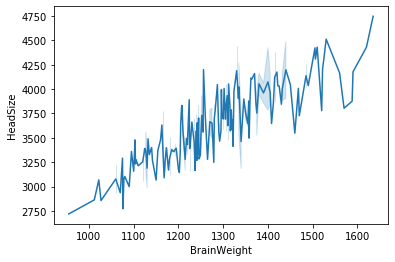

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=df['BrainWeight'],y=df['HeadSize'], data=df)
plt.show()

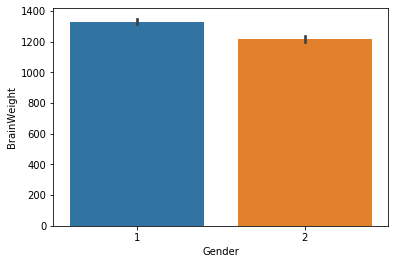

In [108]:
sns.barplot(x=df['Gender'],y=df['BrainWeight'], data=df)
plt.show()

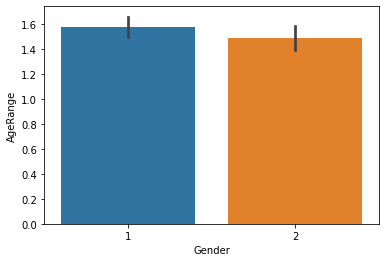

In [109]:
sns.barplot(x=df['Gender'],y=df['AgeRange'], data=df)
plt.show()

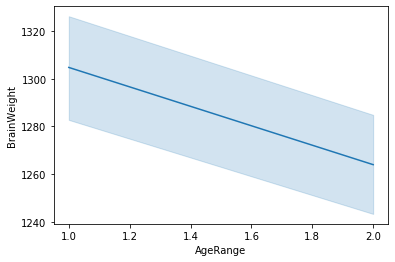

In [110]:
sns.lineplot(x=df['AgeRange'],y=df['BrainWeight'], data=df)
plt.show()

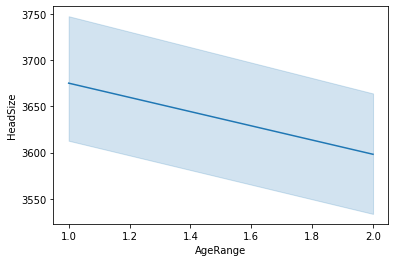

In [111]:
sns.lineplot(x=df['AgeRange'],y=df['HeadSize'], data=df)
plt.show()

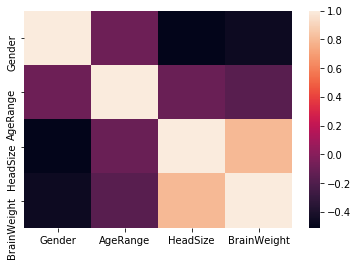

In [112]:
sns.heatmap(df.corr())   

Hightlights :-
    1. Column HeadSize & BrainWeight are directly correlated to each other. If the head Size is changed then it will directly imapct on Brain Weight.
    2. As per the above analysis HeadSize is the most impactable column towards BrainWeight.
    3. We also found that when the age has increased then correspondent Headsize & barinweight is also decreased simultaneously.
    4. BrainWeight & Gender columns haven't correlated to each other.

In [113]:
df.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

In [114]:
# in above data is not skewd. So we can move forward.

In [115]:
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [116]:
# in above dataset does'nt have null values. So we can move forward.

In [117]:
# removing the outliers
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [118]:
threshold=3
print(np.where(z>3))

(array([24], dtype=int64), array([2], dtype=int64))


In [119]:
data=df[(z<3).all (axis=1)]

In [120]:
df.shape

(237, 4)

In [121]:
data.shape

(236, 4)

In [122]:
#Scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale_data=sc.fit_transform(data)
scale_data=pd.DataFrame(scale_data,columns=data.columns)

In [123]:
scale_data.shape

(236, 4)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
from sklearn.metrics import r2_score
from sklearn import linear_model

In [125]:
x=scale_data.drop(['BrainWeight'], axis=1)
x

,Gender,AgeRange,HeadSize
0,-0.880021,-1.079415,2.465898
1,-0.880021,-1.079415,0.303723
2,-0.880021,-1.079415,1.764728
3,-0.880021,-1.079415,0.412670
4,-0.880021,-1.079415,1.530073
...,...,...,...
231,1.136337,0.926427,-1.160075
232,1.136337,0.926427,-0.657244
233,1.136337,0.926427,-1.106999
234,1.136337,0.926427,-0.774571


In [126]:
y=scale_data['BrainWeight']
y

0      2.104656
1      0.132218
2      0.453903
3      0.005237
4      2.612580
         ...   
231   -1.450812
232   -0.561945
233   -1.501604
234   -0.942888
235   -1.366158
Name: BrainWeight, Length: 236, dtype: float64

In [127]:
# PCA (Princple Component Analysis)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x)
x_pca=pca.transform(x)

In [128]:
x.shape

(236, 3)

In [129]:
x_pca.shape

(236, 2)

In [130]:
y.shape

(236,)

In [131]:
y_data=np.array(y)
y=y_data.reshape(-1,1)
y.shape

(236, 1)

In [132]:
max_r_score=0
for r_state in range(42,101):
    x_train, x_test,y_train, y_test=train_test_split(x,y,random_state=r_state,test_size=0.15)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random state: ',r_state,'is: ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('Max r2 score corresponding to:',final_r_state,'is: ',max_r_score)

r2_score corresponding to random state:  42 is:  0.5186925189865939
r2_score corresponding to random state:  43 is:  0.7471706327743664
r2_score corresponding to random state:  44 is:  0.5735760202091635
r2_score corresponding to random state:  45 is:  0.6854662442922426
r2_score corresponding to random state:  46 is:  0.6302816003302896
r2_score corresponding to random state:  47 is:  0.7499965450559896
r2_score corresponding to random state:  48 is:  0.6648467906882876
r2_score corresponding to random state:  49 is:  0.8404480319723701
r2_score corresponding to random state:  50 is:  0.5970768309722525
r2_score corresponding to random state:  51 is:  0.5319220440198487
r2_score corresponding to random state:  52 is:  0.8009979151484965
r2_score corresponding to random state:  53 is:  0.6014059064138577
r2_score corresponding to random state:  54 is:  0.5723556001050565
r2_score corresponding to random state:  55 is:  0.7037576729260222
r2_score corresponding to random state:  56 is: 

In [139]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
#linear={'Best CV is: ':[5,6,7,8,9,10]}
#lnr=linear_model.LinearRegression()
#glnr=GridSearchCV(estimator=lnr,param_grid=linear)
#glnr.fit(x,y)
#print(glnr.best_params_)

In [140]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.4855213166049248

In [142]:
x_train, x_test,y_train, y_test=train_test_split(x,y,random_state=90,test_size=0.15)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("r2 score is: ",r2_score(y_test,y_pred))
print("Root_Mean_Squared_Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.8465788441785833
Root_Mean_Squared_Error:  0.42430887597317796


In [143]:
lr.score(x,y)

0.6402976806628351

In [144]:
alphabets={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model, param_grid=alphabets)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 1}


In [145]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)

[[-0.09802324 -0.09985875  0.72889264]]


In [146]:
rd.score(x,y)

0.6407576276483491

In [147]:
alphabets={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=ElasticNet()
grid=GridSearchCV(estimator=model, param_grid=alphabets)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0}


In [148]:
enr=ElasticNet(alpha=0)
enr=ElasticNet()
enr.fit(x,y)
enr.score(x,y)

0.27009176149156455

In [149]:
alphabets={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model, param_grid=alphabets)
grid.fit(x,y)
print(grid.best_params_)

{'alpha': 0}


In [151]:
ls=Lasso(alpha=0)
ls.fit(x,y)
ls.score(x,y)

0.640769039680498

In [ ]:
#Lasso is the best Algorithem 